In [1]:
import numpy as np

from sklearn import cross_validation, datasets, neighbors, metrics
from matplotlib.colors import ListedColormap
from matplotlib import pylab as plt

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
number_of_samples = 120
sample = datasets.make_classification(n_samples = number_of_samples, n_features = 2, n_informative = 2, n_classes = 4, n_redundant = 0, n_clusters_per_class=1, random_state=6)

In [101]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['salmon', 'skyblue', 'lemonchiffon', 'lawngreen'])

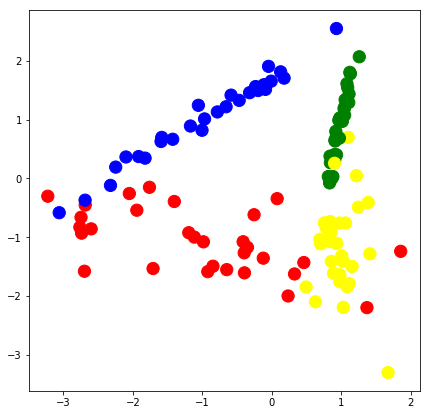

In [102]:
plt.figure(figsize = (7, 7))
plt.scatter(list(map(lambda x: x[0], sample[0])), list(map(lambda x: x[1], sample[0])), c = sample[1], cmap = colors, s = 150)

In [103]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(sample[0], sample[1], test_size = 0.3, random_state = 1)

In [104]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


In [105]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_labels)

    pyplot.figure(figsize = (16, 6))

    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 120, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 120, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

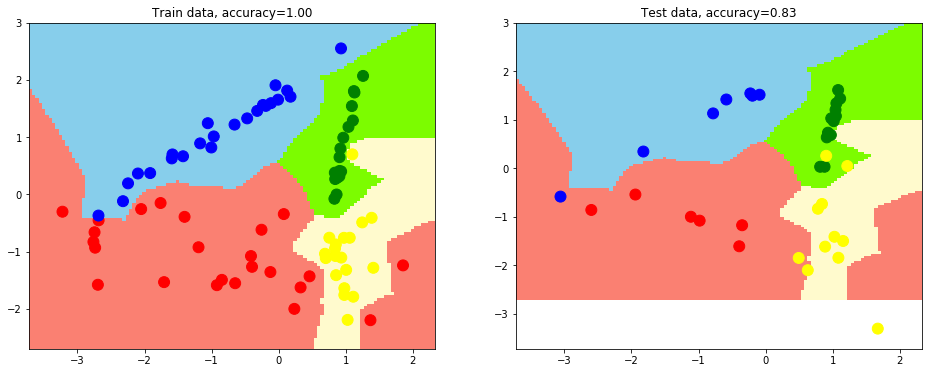

In [106]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

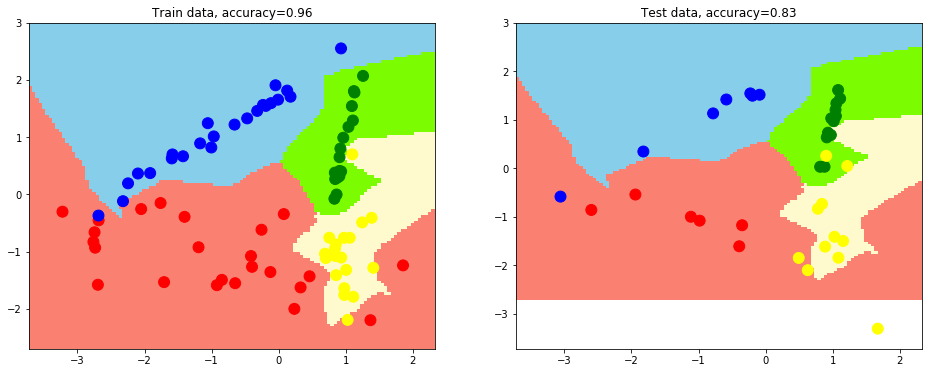

In [107]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

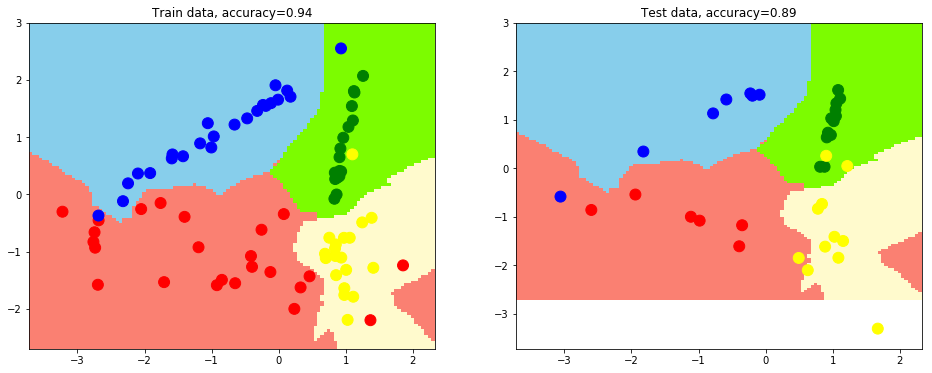

In [108]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

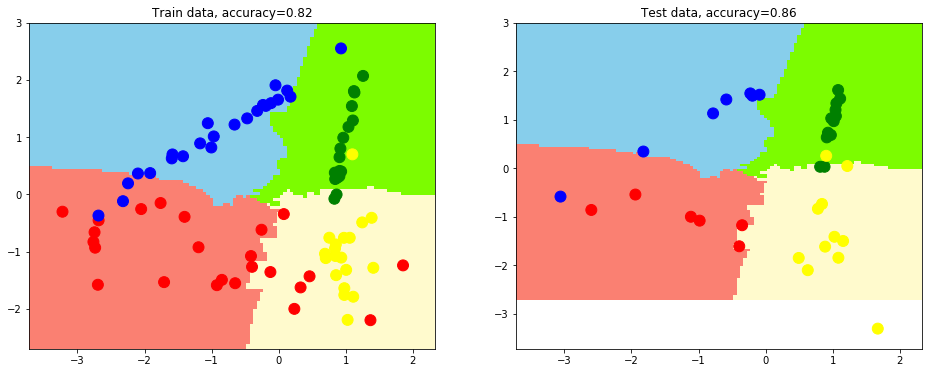

In [109]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [110]:
k_max = 81
arr_accuracy = np.zeros(k_max)

for k in range(1, k_max):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    for train_indices, test_indices in cross_validation.KFold(number_of_samples, n_folds = 5):
        train_data, train_labels = sample[0][train_indices], sample[1][train_indices]
        estimator.fit(train_data, train_labels)
        test_data, test_labels = sample[0][test_indices], sample[1][test_indices]
        arr_accuracy[k] += metrics.accuracy_score(test_labels, estimator.predict(test_data))
        
arr_accuracy /= 5

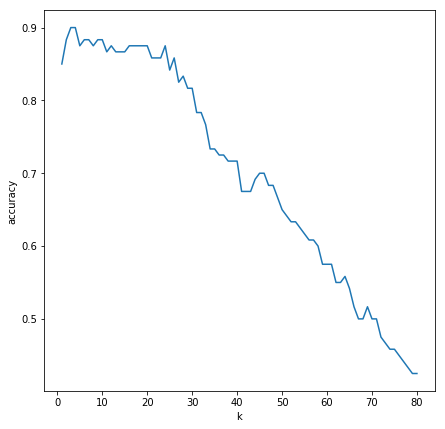

In [111]:
figure(figsize = (7, 7))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(range(1, k_max), arr_accuracy[1:])

In [112]:
k_max = np.argmax(arr_accuracy)
print(k_max)

3


Из графика зависимости accuracy в кросс-валидации от $k$ мы получили оптимальное $k = 3$